# Edge Detection

Contents:
- Sobel Kernel
- Prewitt Kernel

Author: Abijith J. Kamath
https://kamath-abhijith.github.io

In [17]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from skimage import io
from scipy import signal

In [18]:
## FUNCTION DEFINITIONS :: HELPER FUNCTIONS

def threshold_image(image, thr):
    return (image>=thr)*1

def gaussian_filter(image, kernel_size, var):
    m = kernel_size[0]
    n = kernel_size[1]
    gaussian_matrix = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            d = (i-m/2)**2 + (j-n/2)**2
            gaussian_matrix[i,j] = np.exp(-d/(2*var**2))

    return signal.convolve2d(image, gaussian_matrix, mode='same', boundary='fill', fillvalue=0)

## Edge Detection

In [19]:
## FUNCTION DEFINITIONS :: EDGE DETECTION

def basic_edges(image, mode='sobel'):
    if mode == 'sobel':
        kernel_x = np.array([[-1.0, 0.0, 1.0],
                             [-2.0, 0.0, 2.0],
                             [-1.0, 0.0, 1.0]])

        kernel_y = np.array([[-1.0, -2.0, -1.0],
                             [0.0, 0.0, 0.0],
                             [1.0, 2.0, 1.0]])

    elif mode == 'prewitt':
        kernel_x = np.array([[-1.0, 0.0, 1.0],
                             [-1.0, 0.0, 1.0],
                             [-1.0, 0.0, 1.0]])

        kernel_y = np.array([[-1.0, -1.0, -1.0],
                             [0.0, 0.0, 0.0],
                             [1.0, 1.0, 1.0]])

    imgrad_x = signal.convolve2d(image, kernel_x, mode='same', boundary='fill', fillvalue=0)
    imgrad_y = signal.convolve2d(image, kernel_y, mode='same', boundary='fill', fillvalue=0)
    return imgrad_x, imgrad_y

In [20]:
## MAIN :: EDGE DETECTION

book = io.imread('Original-book.png', 0)
barbara = io.imread('barbara.tif', 0)
mit = io.imread('mit.tif', 0)

var = 1
kernel_size = (5,5)
blur_book = gaussian_filter(book, kernel_size, var)
blur_barbara = gaussian_filter(barbara, kernel_size, var)
blur_mit = gaussian_filter(mit, kernel_size, var)

thr = 0.99*255
sobel_book_x, sobel_book_y = basic_edges(blur_book, 'sobel')
sobel_book_magnitude = np.sqrt(sobel_book_x**2 + sobel_book_y**2)
sobel_book_x = threshold_image(sobel_book_x, thr)
sobel_book_y = threshold_image(sobel_book_y, thr)
sobel_book_magnitude = threshold_image(sobel_book_magnitude, thr)

prewitt_book_x, prewitt_book_y = basic_edges(blur_book, 'prewitt')
prewitt_book_magnitude = np.sqrt(prewitt_book_x**2 + prewitt_book_y**2)
prewitt_book_x = threshold_image(prewitt_book_x, thr)
prewitt_book_y = threshold_image(prewitt_book_y, thr)
prewitt_book_magnitude = threshold_image(prewitt_book_magnitude, thr)


sobel_barbara_x, sobel_barbara_y = basic_edges(blur_barbara, 'sobel')
sobel_barbara_magnitude = np.sqrt(sobel_barbara_x**2 + sobel_barbara_y**2)
sobel_barbara_x = threshold_image(sobel_barbara_x, thr)
sobel_barbara_y = threshold_image(sobel_barbara_y, thr)
sobel_barbara_magnitude = threshold_image(sobel_barbara_magnitude, thr)

prewitt_barbara_x, prewitt_barbara_y = basic_edges(blur_barbara, 'prewitt')
prewitt_barbara_magnitude = np.sqrt(prewitt_barbara_x**2 + prewitt_barbara_x**2)
prewitt_barbara_x = threshold_image(prewitt_barbara_x, thr)
prewitt_barbara_y = threshold_image(prewitt_barbara_y, thr)
prewitt_barbara_magnitude = threshold_image(prewitt_barbara_magnitude, thr)


sobel_mit_x, sobel_mit_y = basic_edges(blur_mit, 'sobel')
sobel_mit_magnitude = np.sqrt(sobel_mit_x**2 + sobel_mit_y**2)
sobel_mit_x = threshold_image(sobel_mit_x, thr)
sobel_mit_y = threshold_image(sobel_mit_y, thr)
sobel_mit_magnitude = threshold_image(sobel_mit_magnitude, thr)

prewitt_mit_x, prewitt_mit_y = basic_edges(blur_mit, 'prewitt')
prewitt_mit_magnitude = np.sqrt(prewitt_mit_x**2 + prewitt_mit_y**2)
prewitt_mit_x = threshold_image(prewitt_mit_x, thr)
prewitt_mit_y = threshold_image(prewitt_mit_y, thr)
prewitt_mit_magnitude = threshold_image(prewitt_mit_magnitude, thr)

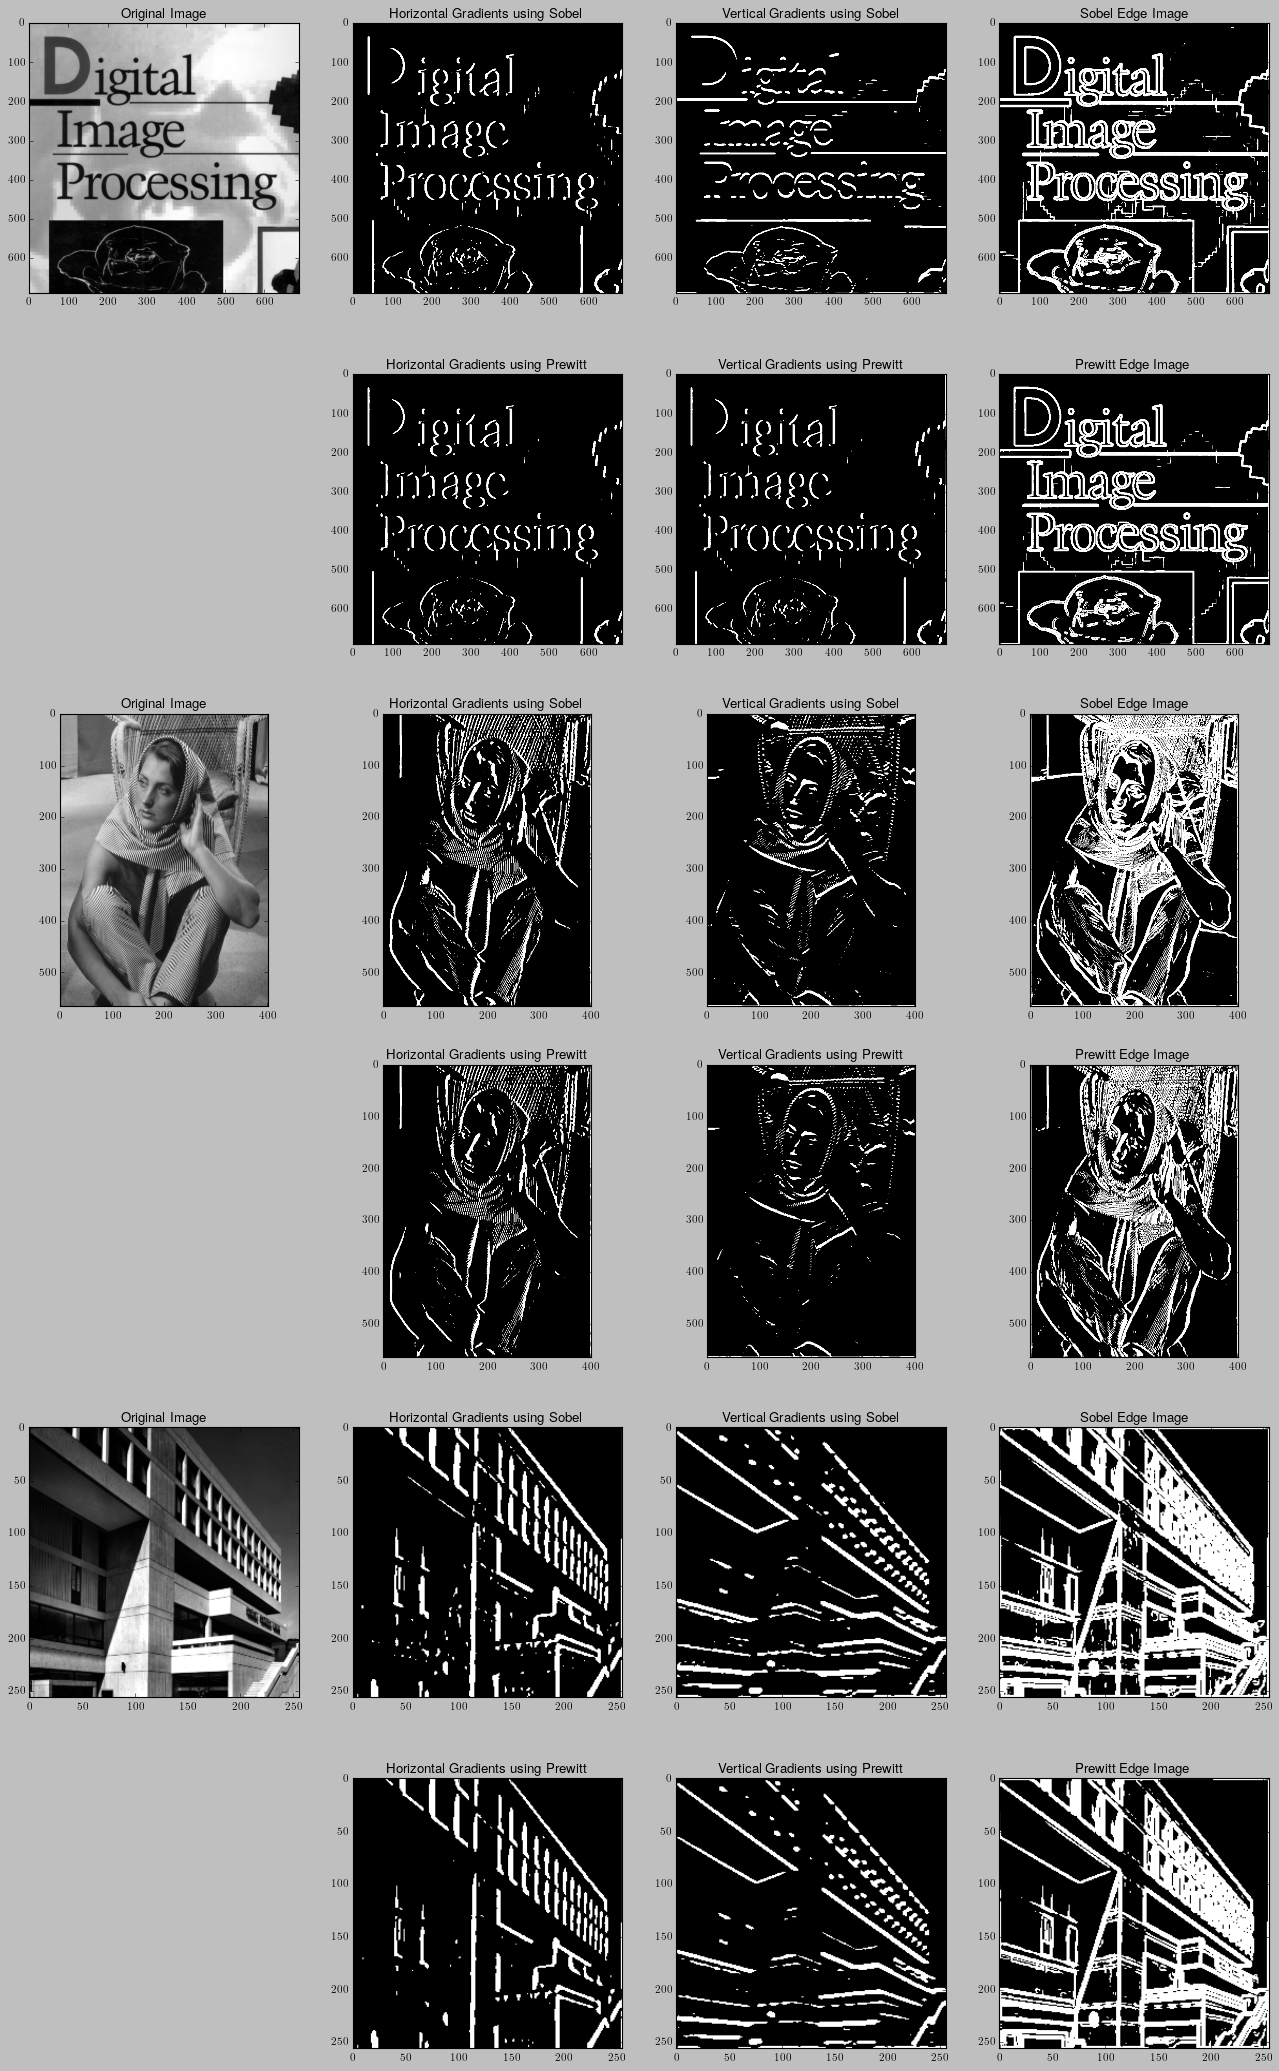

In [24]:
## PLOT :: EDGE DETECTION

style.use('classic')
rcParams['text.usetex'] = True
rcParams.update({'font.size': 10})
rcParams['text.latex.preamble'] = [r'\usepackage{tgheros}'] 

fig, plts = plt.subplots(6,4,figsize=(20,32))
plts[0][0].imshow(book, cmap='gray')
plts[0][0].set_title(r"Original Image")

plts[0][1].imshow(sobel_book_x, cmap='gray')
plts[0][1].set_title(r"Horizontal Gradients using Sobel")

plts[0][2].imshow(sobel_book_y, cmap='gray')
plts[0][2].set_title(r"Vertical Gradients using Sobel")

plts[0][3].imshow(sobel_book_magnitude, cmap='gray')
plts[0][3].set_title(r"Sobel Edge Image")

plts[1][0].axis('off')

plts[1][1].imshow(prewitt_book_x, cmap='gray')
plts[1][1].set_title(r"Horizontal Gradients using Prewitt")

plts[1][2].imshow(prewitt_book_x, cmap='gray')
plts[1][2].set_title(r"Vertical Gradients using Prewitt")

plts[1][3].imshow(prewitt_book_magnitude, cmap='gray')
plts[1][3].set_title(r"Prewitt Edge Image")



plts[2][0].imshow(barbara, cmap='gray')
plts[2][0].set_title(r"Original Image")

plts[2][1].imshow(sobel_barbara_x, cmap='gray')
plts[2][1].set_title(r"Horizontal Gradients using Sobel")

plts[2][2].imshow(sobel_barbara_y, cmap='gray')
plts[2][2].set_title(r"Vertical Gradients using Sobel")

plts[2][3].imshow(sobel_barbara_magnitude, cmap='gray')
plts[2][3].set_title(r"Sobel Edge Image")

plts[3][0].axis('off')

plts[3][1].imshow(prewitt_barbara_x, cmap='gray')
plts[3][1].set_title(r"Horizontal Gradients using Prewitt")

plts[3][2].imshow(prewitt_barbara_y, cmap='gray')
plts[3][2].set_title(r"Vertical Gradients using Prewitt")

plts[3][3].imshow(prewitt_barbara_magnitude, cmap='gray')
plts[3][3].set_title(r"Prewitt Edge Image")


plts[4][0].imshow(mit, cmap='gray')
plts[4][0].set_title(r"Original Image")

plts[4][1].imshow(sobel_mit_x, cmap='gray')
plts[4][1].set_title(r"Horizontal Gradients using Sobel")

plts[4][2].imshow(sobel_mit_y, cmap='gray')
plts[4][2].set_title(r"Vertical Gradients using Sobel")

plts[4][3].imshow(sobel_mit_magnitude, cmap='gray')
plts[4][3].set_title(r"Sobel Edge Image")

plts[5][0].axis('off')

plts[5][1].imshow(prewitt_mit_x, cmap='gray')
plts[5][1].set_title(r"Horizontal Gradients using Prewitt")

plts[5][2].imshow(prewitt_mit_y, cmap='gray')
plts[5][2].set_title(r"Vertical Gradients using Prewitt")

plts[5][3].imshow(prewitt_mit_magnitude, cmap='gray')
plts[5][3].set_title(r"Prewitt Edge Image")

plt.savefig('/Users/abhijith/Desktop/TECHNOLOGIE/Courses/E9 241 Digital Signal Processing/Assignments/Assignment_4/Answers/figures/edges.eps', format='eps')
plt.show()